In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv('data/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [5]:
X=data.iloc[:,:-1]

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Counter(data.target)

Counter({0: 50, 1: 50, 2: 50})

In [7]:
model=KMeans(n_clusters=3)

In [8]:
model

KMeans(n_clusters=3)

In [9]:
model.fit(X)

KMeans(n_clusters=3)

In [10]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [11]:
import numpy as np
np.array(data.target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [13]:
pd.crosstab(data.target,model.labels_)

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


# Elbow technique 

In [15]:
from scipy.spatial.distance import cdist

In [16]:
X=data.iloc[:,:-1]

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
di=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(X)
    di.append(sum(np.min(cdist(X,model.cluster_centers_,'Euclidean'),axis=1))/X.shape[0])
di

[1.943034159037026,
 0.856027968244863,
 0.648839494895334,
 0.5595430270360945,
 0.5104611995137194,
 0.46530088249165374,
 0.43573180559228974,
 0.4123575349271748,
 0.39544859922490827,
 0.38673390407439306,
 0.37045622039319376,
 0.3605165598494194,
 0.3490997510430596,
 0.3394557712724282]

In [23]:
K=range(1,15)

In [25]:
d=pd.DataFrame({'cluster':K,'Distinction':di})
d

,cluster,Distinction
0,1,1.943034
1,2,0.856028
2,3,0.648839
3,4,0.559543
4,5,0.510461
5,6,0.465301
6,7,0.435732
7,8,0.412358
8,9,0.395449
9,10,0.386734


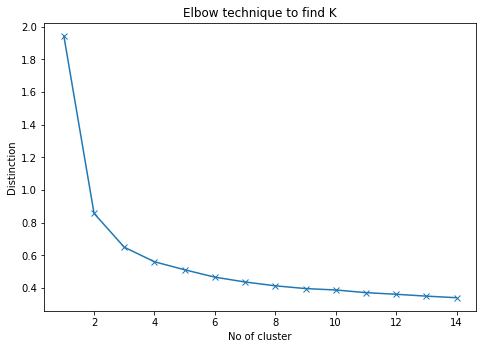

In [28]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('No of cluster')
ax.set_ylabel('Distinction')
ax.set_title('Elbow technique to find K')
ax.plot(K,di,marker='x')